In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install openpyxl

In [6]:
!pwd

/content


In [7]:
# reading the training data shared
df_train=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/train.csv")

# reading the test dataset shared
df_test=pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/test.xlsx")
test_data = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/test.xlsx") # backup
#setting option for displaying only 35 columns
pd.set_option("display.max_columns", 35)

#Overview of the data
df_train.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,log_price,
0,6901257,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",6/18/2016,t,t,NaN,3/26/2012,f,7/18/2016,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,5.010635,NaN
1,6304928,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,8/5/2017,t,f,100%,6/19/2017,t,9/23/2017,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,5.129899,NaN
2,7919400,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,4/30/2017,t,t,100%,10/25/2016,t,9/14/2017,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0,4.976734,NaN
3,13418779,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,4/19/2015,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0,6.620073,NaN
4,3808709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",5/12/2015,t,t,100%,3/1/2015,t,1/22/2017,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0,4.744932,NaN


In [8]:
df_test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,
0,5979389,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,NYC,2 bedroom apartment 3 blocks away from the Dek...,NaT,t,t,1.0,2015-05-29,f,NaT,40.705948,-73.915318,Bedroom in Renovated Apartment with Washer/Dryer,Ridgewood,0,NaN,https://a0.muscache.com/im/pictures/b43127ee-b...,11385,1.0,1.0,NaN
1,13488121,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,LA,This 2015 renovation was done with an eye to b...,2015-11-16,t,t,1.0,2015-08-17,f,2017-04-23,34.118408,-118.317929,Peaceful and Quiet Hollywood Hills,Hollywood Hills,24,100.0,https://a0.muscache.com/im/pictures/894d8ca5-7...,90068,1.0,1.0,NaN
2,8121643,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,NYC,Apt features shared living room w/ Apple TV. ...,NaT,t,f,NaN,2012-06-18,f,NaT,40.707888,-74.015211,"Luxury, doorman Building- FIDI",Financial District,0,NaN,NaN,10006,1.0,1.0,NaN
3,16490010,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,NYC,Our home is equidistance to the L and G trains...,2016-09-29,t,t,1.0,2011-12-12,f,2017-09-24,40.721388,-73.945642,Cozy room in sunny historic Greenpoint home,Greenpoint,12,98.0,https://a0.muscache.com/im/pictures/6c99615c-4...,11222,1.0,1.0,NaN
4,16274069,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,True,NYC,JUST 20 MINUTES BY TRAIN TO MANHATTAN - AFFORD...,2015-01-05,t,f,1.0,2014-11-02,f,2017-09-14,40.682556,-73.943259,B's Suite,Bedford-Stuyvesant,13,92.0,https://a0.muscache.com/im/pictures/56275358/c...,11216,2.0,3.0,NaN


In [9]:
df_train.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price', ' '],
      dtype='object')

In [10]:
df_test.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', ' '],
      dtype='object')

In [11]:
df_train.amenities=df_train.amenities.map(lambda x: "|".join([i.replace('}',"").replace("{","").replace('"',"") for i in x.split(",")]))
df_test.amenities=df_test.amenities.map(lambda x: "|".join([i.replace('}',"").replace("{","").replace('"',"") for i in x.split(",")]))
df_train.amenities.head()

0    Wireless Internet|Air conditioning|Kitchen|Hea...
1    Wireless Internet|Air conditioning|Kitchen|Hea...
2    TV|Cable TV|Wireless Internet|Air conditioning...
3    TV|Cable TV|Internet|Wireless Internet|Kitchen...
4    TV|Internet|Wireless Internet|Air conditioning...
Name: amenities, dtype: object

In [12]:
df_test.amenities.head()

0    Wireless Internet|Air conditioning|Kitchen|Hea...
1    TV|Cable TV|Internet|Wireless Internet|Air con...
2    TV|Cable TV|Internet|Wireless Internet|Air con...
3    Internet|Wireless Internet|Air conditioning|Ki...
4    TV|Internet|Wireless Internet|Air conditioning...
Name: amenities, dtype: object

In [13]:
df_train.amenities=df_train.amenities.map(lambda x: x.split("|"))
df_test.amenities=df_test.amenities.map(lambda x: x.split("|"))
df_train.amenities.head()

0    [Wireless Internet, Air conditioning, Kitchen,...
1    [Wireless Internet, Air conditioning, Kitchen,...
2    [TV, Cable TV, Wireless Internet, Air conditio...
3    [TV, Cable TV, Internet, Wireless Internet, Ki...
4    [TV, Internet, Wireless Internet, Air conditio...
Name: amenities, dtype: object

In [14]:
df_test.amenities.head()

0    [Wireless Internet, Air conditioning, Kitchen,...
1    [TV, Cable TV, Internet, Wireless Internet, Ai...
2    [TV, Cable TV, Internet, Wireless Internet, Ai...
3    [Internet, Wireless Internet, Air conditioning...
4    [TV, Internet, Wireless Internet, Air conditio...
Name: amenities, dtype: object

In [15]:
amenities_list=list(np.unique(np.concatenate(df_train.amenities))[1:-2])
amenities_list_test=list(np.unique(np.concatenate(df_test.amenities))[1:-2])
print(amenities_list)
print(amenities_list_test)

[' smooth pathway to front door', '24-hour check-in', 'Accessible-height bed', 'Accessible-height toilet', 'Air conditioning', 'Air purifier', 'BBQ grill', 'Baby bath', 'Baby monitor', 'Babysitter recommendations', 'Bath towel', 'Bathtub', 'Bathtub with shower chair', 'Beach essentials', 'Beachfront', 'Bed linens', 'Body soap', 'Breakfast', 'Buzzer/wireless intercom', 'Cable TV', 'Carbon monoxide detector', 'Cat(s)', 'Changing table', 'Children’s books and toys', 'Children’s dinnerware', 'Cleaning before checkout', 'Coffee maker', 'Cooking basics', 'Crib', 'Disabled parking spot', 'Dishes and silverware', 'Dishwasher', 'Dog(s)', 'Doorman', 'Doorman Entry', 'Dryer', 'EV charger', 'Elevator', 'Elevator in building', 'Essentials', 'Ethernet connection', 'Extra pillows and blankets', 'Family/kid friendly', 'Fire extinguisher', 'Fireplace guards', 'Firm matress', 'Firm mattress', 'First aid kit', 'Fixed grab bars for shower & toilet', 'Flat', 'Flat smooth pathway to front door', 'Free parki

In [16]:
df_train['amenities_percentage']=df_train.amenities.apply(lambda x: len(x)/len(amenities_list)*100)
df_test['amenities_percentage']=df_test.amenities.apply(lambda x: len(x)/len(amenities_list_test)*100)

In [17]:
df_train_new = df_train[['id', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
             'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 
             'host_response_rate', 'host_since', 'instant_bookable', 'number_of_reviews','review_scores_rating',
            'amenities_percentage', 'log_price']]

In [18]:
df_test_new = df_test[['id', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
             'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified', 
             'host_response_rate', 'host_since', 'instant_bookable', 'number_of_reviews','review_scores_rating',
            'amenities_percentage']]

In [19]:
df_train_new.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage,log_price
0,6901257,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,strict,True,NYC,t,t,NaN,3/26/2012,f,2,100.0,7.03125,5.010635
1,6304928,Apartment,Entire home/apt,7,1.0,3.0,3.0,Real Bed,strict,True,NYC,t,f,100%,6/19/2017,t,6,93.0,11.71875,5.129899
2,7919400,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,moderate,True,NYC,t,t,100%,10/25/2016,t,10,92.0,14.84375,4.976734
3,13418779,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,flexible,True,SF,t,t,NaN,4/19/2015,f,0,NaN,11.71875,6.620073
4,3808709,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,moderate,True,DC,t,t,100%,3/1/2015,t,4,40.0,9.37500,4.744932


In [20]:
df_test_new.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage
0,5979389,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,strict,True,NYC,t,t,1.0,2015-05-29,f,0,NaN,11.475410
1,13488121,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,moderate,True,LA,t,t,1.0,2015-08-17,f,24,100.0,20.491803
2,8121643,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,flexible,False,NYC,t,f,NaN,2012-06-18,f,0,NaN,19.672131
3,16490010,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,flexible,True,NYC,t,t,1.0,2011-12-12,f,12,98.0,13.114754
4,16274069,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,moderate,True,NYC,t,f,1.0,2014-11-02,f,13,92.0,10.655738


In [21]:
df_train_new.shape

(49999, 20)

In [22]:
df_test_new.shape

(24111, 19)

### 1. Explanatory Data Analysis (EDA)

In [23]:
df_train_new.describe()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,amenities_percentage,log_price
count,4.999900e+04,49999.000000,49853.000000,49937.000000,49908.000000,49999.000000,38698.000000,49999.000000,49999.000000
mean,1.125866e+07,3.157563,1.235151,1.266776,1.712431,21.000380,94.055972,13.732837,4.781831
std,6.086302e+06,2.165059,0.582082,0.853917,1.259860,38.131564,7.870579,5.419431,0.716910
min,3.440000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.781250,1.609438
25%,6.245858e+06,2.000000,1.000000,1.000000,1.000000,1.000000,92.000000,10.156250,4.317488
50%,1.225244e+07,2.000000,1.000000,1.000000,1.000000,6.000000,96.000000,13.281250,4.709530
75%,1.641108e+07,4.000000,1.000000,1.000000,2.000000,24.000000,100.000000,17.187500,5.220356
max,2.122836e+07,16.000000,8.000000,10.000000,16.000000,605.000000,100.000000,60.937500,7.600402


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
df_test_new.describe()

,id,accommodates,bathrooms,bedrooms,beds,host_response_rate,number_of_reviews,review_scores_rating,amenities_percentage
count,2.411100e+04,24111.000000,24057.000000,24082.000000,24071.000000,18150.000000,24111.000000,18690.000000,24111.000000
mean,1.128284e+07,3.150222,1.235503,1.263765,1.707657,0.944765,20.694330,94.091332,14.469826
std,6.072319e+06,2.129642,0.581988,0.848485,1.242239,0.161063,37.193163,7.765832,5.686083
min,3.330000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.819672
25%,6.289926e+06,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,92.000000,10.655738
50%,1.227131e+07,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,96.000000,13.934426
75%,1.638105e+07,4.000000,1.000000,1.000000,2.000000,1.000000,23.000000,100.000000,18.032787
max,2.123090e+07,16.000000,8.000000,10.000000,18.000000,1.000000,505.000000,100.000000,70.491803


In [26]:
df_train_new.isna().sum()

id                            0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   146
bedrooms                     62
beds                         91
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12338
host_since                  127
instant_bookable              0
number_of_reviews             0
review_scores_rating      11301
amenities_percentage          0
log_price                     0
dtype: int64

In [27]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24111 entries, 0 to 24110
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      24111 non-null  int64         
 1   property_type           24111 non-null  object        
 2   room_type               24111 non-null  object        
 3   accommodates            24111 non-null  int64         
 4   bathrooms               24057 non-null  float64       
 5   bedrooms                24082 non-null  float64       
 6   beds                    24071 non-null  float64       
 7   bed_type                24111 non-null  object        
 8   cancellation_policy     24111 non-null  object        
 9   cleaning_fee            24111 non-null  bool          
 10  city                    24111 non-null  object        
 11  host_has_profile_pic    24050 non-null  object        
 12  host_identity_verified  24050 non-null  object

In [28]:
df_test_new.isna().sum()

id                           0
property_type                0
room_type                    0
accommodates                 0
bathrooms                   54
bedrooms                    29
beds                        40
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
host_has_profile_pic        61
host_identity_verified      61
host_response_rate        5961
host_since                  61
instant_bookable             0
number_of_reviews            0
review_scores_rating      5421
amenities_percentage         0
dtype: int64

In [29]:
#dropping the "NaN" values for the columns as the number of NaNs are not that significant
df_train_new = df_train_new[df_train_new.bathrooms.notna()]
df_train_new = df_train_new[df_train_new.bedrooms.notna()]
df_train_new = df_train_new[df_train_new.beds.notna()]
df_train_new = df_train_new[df_train_new.host_since.notna()]


#filling the missing values with "median" (for numerical features)
#df_test_new['bathrooms']=df_test_new['bathrooms'].apply(lambda col: col.fillna(col.median()))
df_test_new.loc[:,'bathrooms']=df_test_new['bathrooms'].fillna(df_test_new['bathrooms'].median())
df_test_new.loc[:,'bedrooms']=df_test_new['bedrooms'].fillna(df_test_new['bedrooms'].median())
df_test_new.loc[:,"beds"]=df_test_new['beds'].fillna(df_test_new['beds'].median())
df_test_new['host_since']=df_test_new['host_since'].fillna(df_test_new['host_since'].mode()[0])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [30]:
df_train_new.host_response_rate = df_train_new.host_response_rate.fillna("0%")
df_train_new.review_scores_rating = df_train_new.review_scores_rating.fillna(0)
df_test_new.host_response_rate = df_test_new.host_response_rate.fillna("0%")
df_test_new.review_scores_rating = df_test_new.review_scores_rating.fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
df_train_new.isna().sum()

id                        0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
amenities_percentage      0
log_price                 0
dtype: int64

In [32]:
df_test_new.isna().sum()

id                         0
property_type              0
room_type                  0
accommodates               0
bathrooms                  0
bedrooms                   0
beds                       0
bed_type                   0
cancellation_policy        0
cleaning_fee               0
city                       0
host_has_profile_pic      61
host_identity_verified    61
host_response_rate         0
host_since                 0
instant_bookable           0
number_of_reviews          0
review_scores_rating       0
amenities_percentage       0
dtype: int64

In [33]:
df_train_new.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage,log_price
0,6901257,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,strict,True,NYC,t,t,0%,3/26/2012,f,2,100.0,7.03125,5.010635
1,6304928,Apartment,Entire home/apt,7,1.0,3.0,3.0,Real Bed,strict,True,NYC,t,f,100%,6/19/2017,t,6,93.0,11.71875,5.129899
2,7919400,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,moderate,True,NYC,t,t,100%,10/25/2016,t,10,92.0,14.84375,4.976734
3,13418779,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,flexible,True,SF,t,t,0%,4/19/2015,f,0,0.0,11.71875,6.620073
4,3808709,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,moderate,True,DC,t,t,100%,3/1/2015,t,4,40.0,9.37500,4.744932


In [34]:
df_test_new.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage
0,5979389,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,strict,True,NYC,t,t,1,2015-05-29,f,0,0.0,11.475410
1,13488121,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,moderate,True,LA,t,t,1,2015-08-17,f,24,100.0,20.491803
2,8121643,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,flexible,False,NYC,t,f,0%,2012-06-18,f,0,0.0,19.672131
3,16490010,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,flexible,True,NYC,t,t,1,2011-12-12,f,12,98.0,13.114754
4,16274069,Apartment,Entire home/apt,4,1.0,2.0,3.0,Real Bed,moderate,True,NYC,t,f,1,2014-11-02,f,13,92.0,10.655738


In [35]:
property_type_list_train = ['Apartment', 'House', 'Condominium', 'Townnhouse', 'Loft']
property_type_list_test = ['Apartment', 'House', 'Condominium', 'Townnhouse', 'Loft']

In [36]:
df_train_new.property_type=df_train_new.property_type.apply(lambda x: x if x in property_type_list_train else 'others')
df_test_new.property_type=df_test_new.property_type.apply(lambda x: x if x in property_type_list_test else 'others')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
df_train_new.cleaning_fee=df_train_new.cleaning_fee.apply(lambda x: 'True' if x is True else "False")
df_train_new.host_has_profile_pic = df_train_new.host_has_profile_pic.apply(lambda x: "True" if x == "t" else "False")
df_train_new.host_identity_verified = df_train_new.host_identity_verified.apply(lambda x: "True" if x == "t" else "False")
df_train_new.instant_bookable = df_train_new.instant_bookable.apply(lambda x: "True" if x == "t" else "False")
df_train_new.host_response_rate = df_train_new.host_response_rate.astype(str).apply(lambda x: str(x.strip("%")))

df_test_new.cleaning_fee=df_test_new.cleaning_fee.apply(lambda x: 'True' if x is True else "False")
df_test_new.host_has_profile_pic = df_test_new.host_has_profile_pic.apply(lambda x: "True" if x == "t" else "False")
df_test_new.host_identity_verified = df_test_new.host_identity_verified.apply(lambda x: "True" if x == "t" else "False")
df_test_new.instant_bookable = df_test_new.instant_bookable.apply(lambda x: "True" if x == "t" else "False")
df_test_new.host_response_rate = df_test_new.host_response_rate.astype(str).apply(lambda x: str(x.strip("%")))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [38]:
df_train_new.host_since = pd.to_datetime(df_train_new.host_since)
today = "2021-07-10"
df_train_new['host_days'] = df_train_new.host_since.apply(lambda x: (pd.to_datetime(today) - x).days)

df_test_new.host_since = pd.to_datetime(df_test_new.host_since)
today = "2021-07-10"
df_test_new['host_days'] = df_test_new.host_since.apply(lambda x: (pd.to_datetime(today) - x).days)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [39]:
df_train_new=df_train_new.drop(['host_since'], axis=1)
df_test_new=df_test_new.drop(['host_since'], axis=1)

In [40]:
df_train_new['price'] = df_train_new['log_price']
df_train_new = df_train_new.drop(columns='log_price')

In [41]:
df_train_new.describe()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,amenities_percentage,host_days,price
count,4.963400e+04,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000,49634.000000
mean,1.125357e+07,3.163537,1.235867,1.267760,1.714551,20.991316,72.816497,13.761169,2542.804368,4.782686
std,6.087483e+06,2.168081,0.582983,0.855359,1.261953,38.131578,39.941721,5.407886,658.589538,0.717592
min,3.440000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.781250,1375.000000,1.609438
25%,6.237642e+06,2.000000,1.000000,1.000000,1.000000,1.000000,80.000000,10.156250,2027.000000,4.317488
50%,1.224780e+07,2.000000,1.000000,1.000000,1.000000,6.000000,94.000000,13.281250,2474.000000,4.718499
75%,1.640647e+07,4.000000,1.000000,1.000000,2.000000,24.000000,99.000000,17.187500,2997.000000,5.220356
max,2.122836e+07,16.000000,8.000000,10.000000,16.000000,605.000000,100.000000,60.937500,4876.000000,7.600402


In [42]:
df_test_new.describe()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,amenities_percentage,host_days
count,2.411100e+04,24111.000000,24111.000000,24111.000000,24111.000000,24111.000000,24111.000000,24111.000000,24111.000000
mean,1.128284e+07,3.150222,1.234976,1.263448,1.706483,20.694330,72.936295,14.469826,2545.276596
std,6.072319e+06,2.129642,0.581442,0.848024,1.241542,37.193163,39.872074,5.686083,662.010868
min,3.330000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.819672,1375.000000
25%,6.289926e+06,2.000000,1.000000,1.000000,1.000000,1.000000,80.000000,10.655738,2027.000000
50%,1.227131e+07,2.000000,1.000000,1.000000,1.000000,6.000000,94.000000,13.934426,2474.000000
75%,1.638105e+07,4.000000,1.000000,1.000000,2.000000,23.000000,99.000000,18.032787,2999.000000
max,2.123090e+07,16.000000,8.000000,10.000000,18.000000,505.000000,100.000000,70.491803,4877.000000


In [43]:
df_test_new.isna().sum()

id                        0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
amenities_percentage      0
host_days                 0
dtype: int64

In [44]:
df_test_new.shape

(24111, 19)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'host_response_rate')

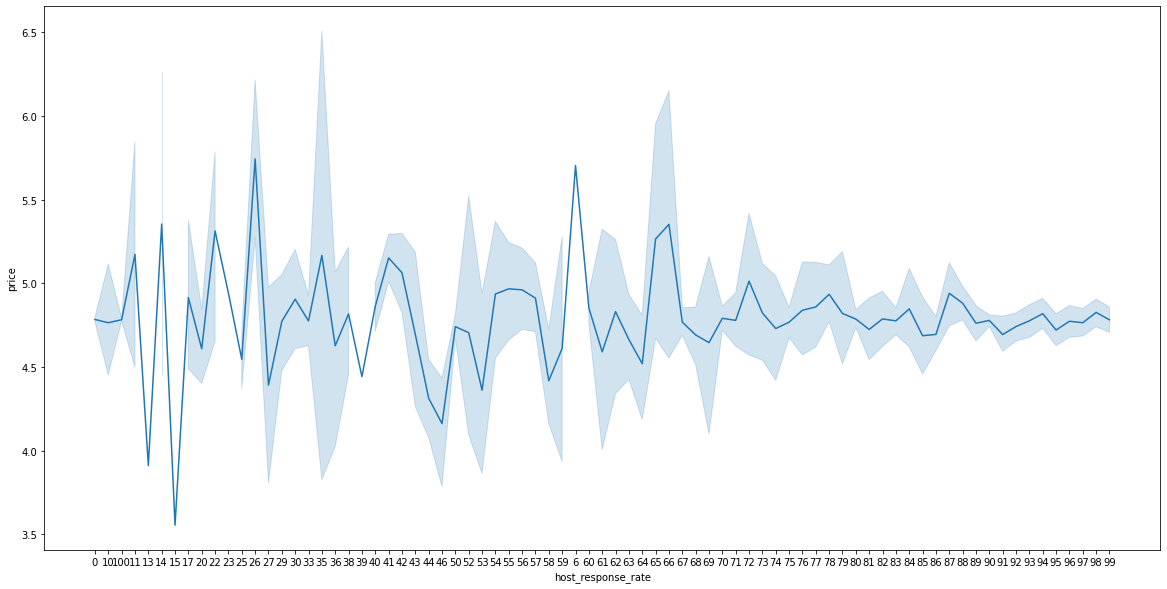

In [59]:
plt.figure(figsize=(20,10))
sns.lineplot(np.sort(df_train_new['host_response_rate']), df_train_new['price'])
plt.xlabel("host_response_rate")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'number_of_reviews')

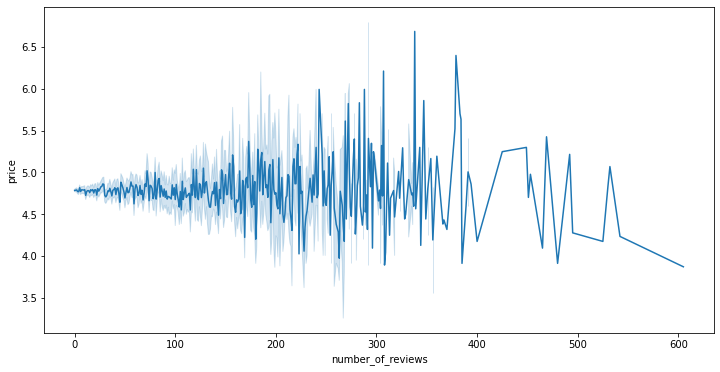

In [60]:
plt.figure(figsize=(12,6))
sns.lineplot(np.sort(df_train_new.number_of_reviews), df_train_new.price)
plt.xlabel("number_of_reviews")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


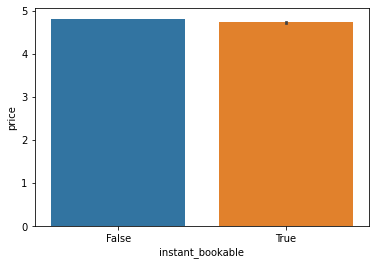

In [63]:
sns.barplot(df_train_new.instant_bookable, df_train_new.price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


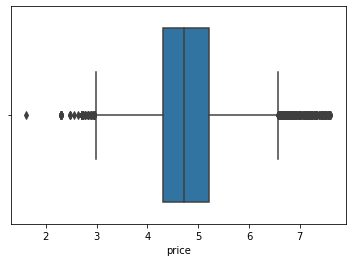

In [44]:
#Check outliers

sns.boxplot(df_train_new.price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


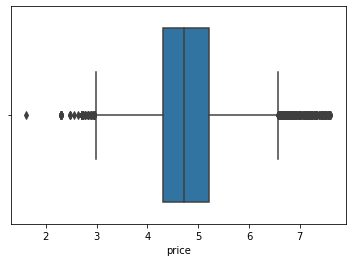

In [45]:
#Check outliers

sns.boxplot(df_train_new.price)

In [46]:
#Remove outliers

from numpy import mean
from numpy import std

def remove_outliers(x):
    data_mean = mean(x)
    data_std = std(x)
    cutoff = data_std*3
    lower = data_mean - cutoff
    upper = data_mean + cutoff
    return lower, upper

lower, upper = remove_outliers(df_train_new.price)

df_train_new = df_train_new.loc[(df_train_new.price > lower) & (df_train_new.price < upper)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


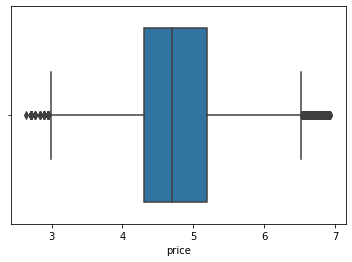

In [47]:
sns.boxplot(df_train_new.price)

### 2. Feature Engineering

In [48]:
df_train_new.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage,host_days,price
0,6901257,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,strict,True,NYC,True,True,0,False,2,100.0,7.03125,3393,5.010635
1,6304928,Apartment,Entire home/apt,7,1.0,3.0,3.0,Real Bed,strict,True,NYC,True,False,100,True,6,93.0,11.71875,1482,5.129899
2,7919400,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,moderate,True,NYC,True,True,100,True,10,92.0,14.84375,1719,4.976734
3,13418779,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,flexible,True,SF,True,True,0,False,0,0.0,11.71875,2274,6.620073
4,3808709,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,moderate,True,DC,True,True,100,True,4,40.0,9.37500,2323,4.744932


In [49]:
df_train_new.describe()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,amenities_percentage,host_days,price
count,4.928900e+04,49289.000000,49289.000000,49289.000000,49289.000000,49289.000000,49289.000000,49289.000000,49289.000000,49289.000000
mean,1.125391e+07,3.133519,1.224543,1.255209,1.699223,21.107204,73.061758,13.756683,2543.634563,4.767687
std,6.086849e+06,2.117838,0.549336,0.831224,1.232094,38.228129,39.775980,5.405852,658.851722,0.690146
min,3.440000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.781250,1375.000000,2.639057
25%,6.238463e+06,2.000000,1.000000,1.000000,1.000000,1.000000,80.000000,10.156250,2028.000000,4.304065
50%,1.225065e+07,2.000000,1.000000,1.000000,1.000000,6.000000,94.000000,13.281250,2475.000000,4.700480
75%,1.640587e+07,4.000000,1.000000,1.000000,2.000000,24.000000,99.000000,17.187500,2998.000000,5.192957
max,2.122836e+07,16.000000,8.000000,10.000000,16.000000,605.000000,100.000000,60.937500,4876.000000,6.932448


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


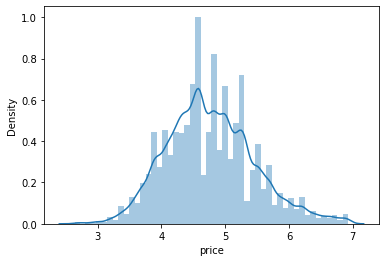

In [50]:
sns.distplot(df_train_new.price)

In [51]:
from sklearn.model_selection import train_test_split

X = df_train_new.iloc[:, 1:-1]
y = df_train_new.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
df_test_new=df_test_new.iloc[:,1:]

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Binary variables

le = LabelEncoder()

binary_var = ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

for i in binary_var:
    le.fit(X_train[i])
    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [53]:
le_test = LabelEncoder()

binary_var_test = ['cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

for i in binary_var_test:
    le_test.fit(df_test_new[i])
    df_test_new[i] = le_test.transform(df_test_new[i])

In [54]:
#Multi-category variables

oe = OneHotEncoder(sparse=False, handle_unknown = 'error')
oe.fit(X_train[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']])

multi = oe.transform(X_train[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']])
df_multi = pd.DataFrame(index = X_train.index, data=multi, columns=oe.get_feature_names(['property_type', 'room_type',
                                                                    'bed_type', 'cancellation_policy', 'city']))
X_train = pd.concat([X_train, df_multi], axis=1)
X_train.drop(columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city'], inplace=True)

In [55]:
df_test_new.shape

(24111, 18)

In [56]:
oe.fit(df_test_new[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']])

multi_df_test_new = oe.transform(df_test_new[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']])
df_multi_test_new = pd.DataFrame(index = df_test_new.index, data=multi_df_test_new, columns=oe.get_feature_names(['property_type', 'room_type',
                                                                    'bed_type', 'cancellation_policy', 'city']))
df_test_new = pd.concat([df_test_new, df_multi_test_new], axis=1)
df_test_new.drop(columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city'], inplace=True)

In [57]:
multi_test = oe.transform(X_test[['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']])
df_multi_test = pd.DataFrame(index = X_test.index, data=multi_test, columns=oe.get_feature_names(['property_type', 'room_type',
                                                                    'bed_type', 'cancellation_policy', 'city']))
X_test = pd.concat([X_test, df_multi_test], axis=1)
X_test.drop(columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city'], inplace=True)

In [58]:
X_train.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage,host_days,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,...,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
33506,3,1.0,1.0,1.0,1,1,1,78,0,15,88.0,10.15625,2915,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48632,4,1.0,1.0,1.0,1,1,0,100,1,4,100.0,15.62500,1769,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32771,1,1.0,1.0,1.0,1,1,1,100,0,7,94.0,9.37500,2338,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7757,6,3.0,3.0,3.0,1,1,0,0,1,3,0.0,9.37500,1729,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38011,2,1.0,1.0,1.0,1,1,0,100,0,0,0.0,15.62500,3321,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
X_train.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'number_of_reviews', 'review_scores_rating',
       'amenities_percentage', 'host_days', 'property_type_Apartment',
       'property_type_Condominium', 'property_type_House',
       'property_type_Loft', 'property_type_others',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'city_Boston', 'city_Chicago',
       'city_DC', 'city_LA', 'city_NYC', 'city_SF'],
      dtype='object')

In [60]:
X_test.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage,host_days,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,...,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
19262,2,1.5,1.0,1.0,0,1,1,100,0,86,87.0,7.03125,4084,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40901,7,1.5,2.0,5.0,1,1,0,100,1,2,80.0,12.50000,1425,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12767,10,3.0,4.0,4.0,1,1,0,100,0,11,93.0,21.09375,1830,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26483,2,2.0,1.0,1.0,0,1,1,0,1,6,73.0,8.59375,2432,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47706,1,1.5,0.0,1.0,0,1,0,100,0,132,97.0,15.62500,1984,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [61]:
df_test_new.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,amenities_percentage,host_days,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Loft,...,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,2,1.0,1.0,1.0,1,1,1,1.0,0,0,0.0,11.475410,2234,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,1.0,1.0,1.0,1,1,1,1.0,0,24,100.0,20.491803,2154,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.0,1.0,1.0,0,1,0,0,0,0,0.0,19.672131,3309,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,1.0,1.0,1.0,1,1,1,1.0,0,12,98.0,13.114754,3498,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,1.0,2.0,3.0,1,1,0,1.0,0,13,92.0,10.655738,2442,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
df_test_new.shape

(24111, 37)

### 3. Feature Scaling

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


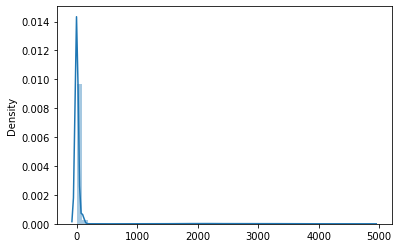

In [64]:
sns.distplot(X_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


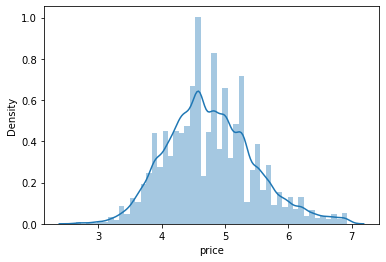

In [65]:
sns.distplot(y_train)

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mn = MinMaxScaler()

X_train_scaled = pd.DataFrame(mn.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(mn.transform(X_test), columns = X_test.columns)

y_train_scaled = pd.DataFrame(mn.fit_transform(y_train.to_numpy().reshape(-1,1)), columns = ['price'], index = X_train_scaled.index)
y_test_scaled = pd.DataFrame(mn.transform(y_test.to_numpy().reshape(-1,1)), columns = ['price'], index = X_test_scaled.index)

In [67]:
mn_test = MinMaxScaler()

df_test_new_scaled = pd.DataFrame(mn_test.fit_transform(df_test_new), columns = df_test_new.columns)

### 4. Neural Network Optimisation (Neural Network + Feature Selection)

In [68]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

463/463 [==============================] - 0s 940us/step - loss: 0.1903 - mse: 0.1903


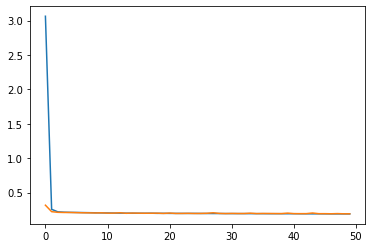

In [69]:
#Step1. Define the model

model = Sequential()

model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled.shape[1],)))
model.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(1))


#Step2. Compile the model
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model

loss, mse = model.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

##4.2. Neural Networks with Feature Selection 
####4.2.1. Neural Networks with Correlation Heatmap

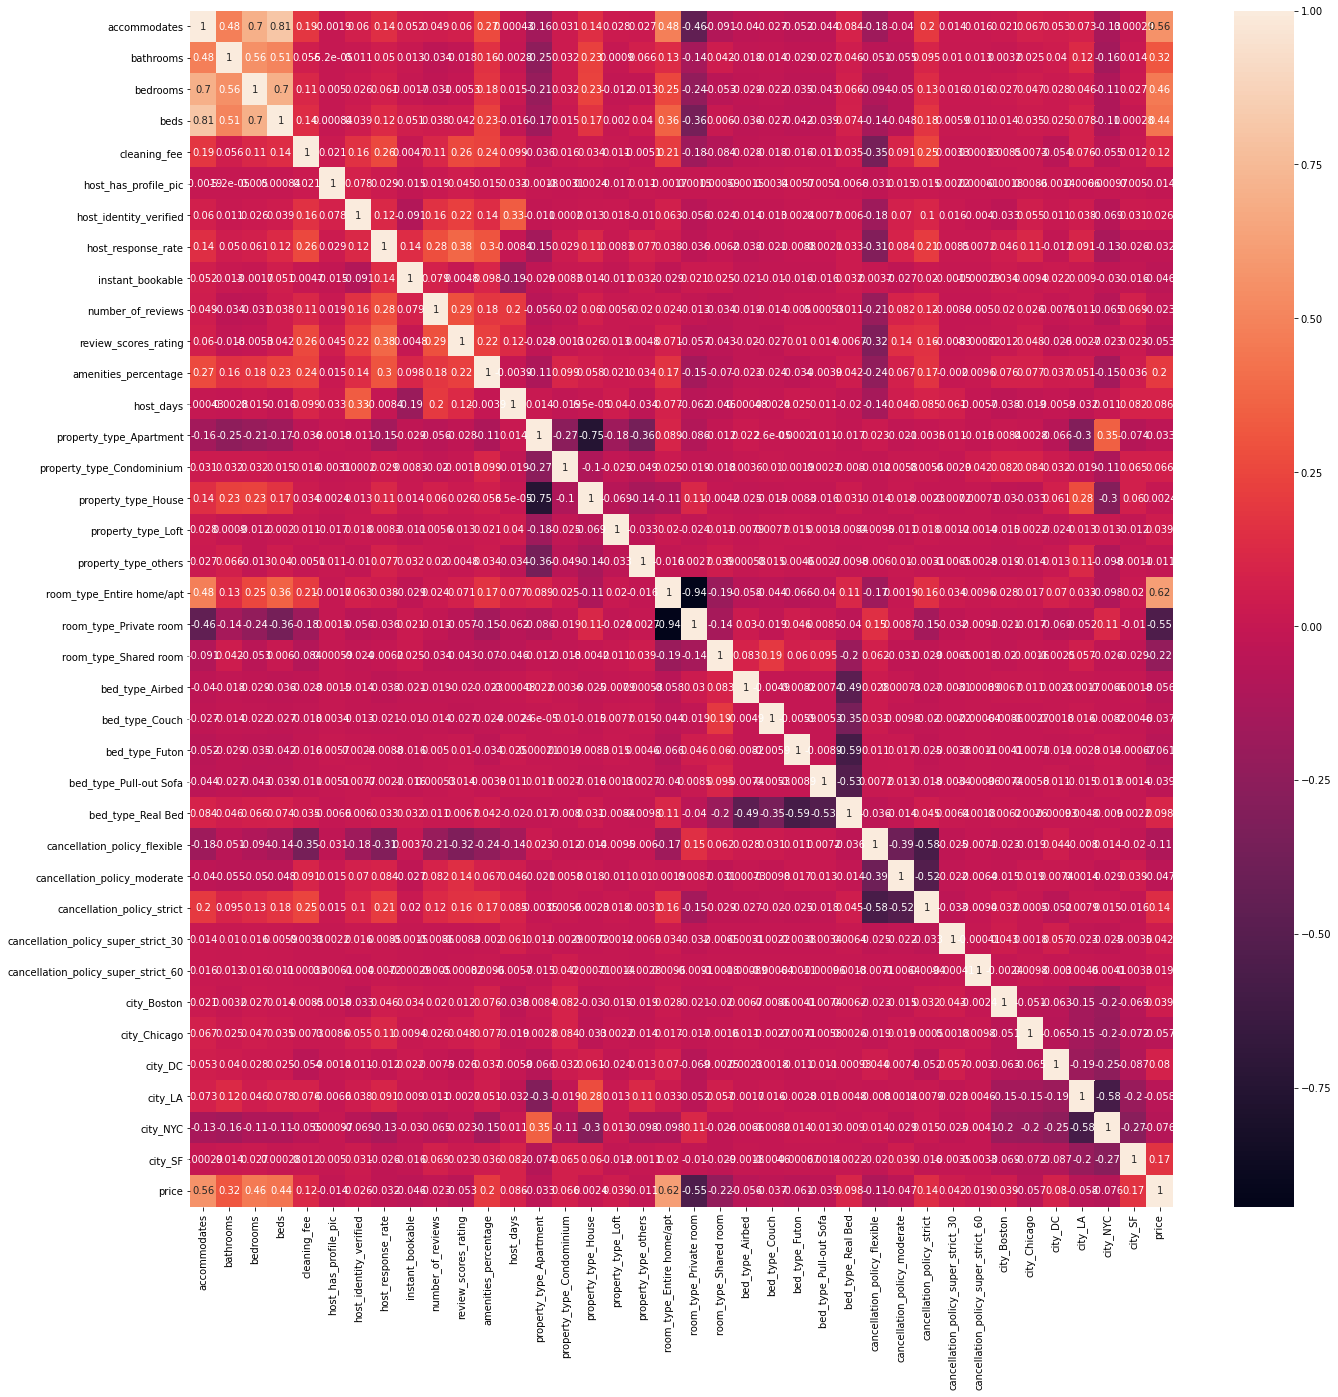

In [70]:
df_train_scaled = pd.concat([X_train_scaled, y_train_scaled], axis=1)
cor = df_train_scaled.corr()

plt.figure(figsize=(22,22))
sns.heatmap(cor, xticklabels = df_train_scaled.columns, yticklabels = df_train_scaled.columns, annot=True)
plt.show()

In [71]:
correlation = cor.iloc[-1,:].sort_values()
print(correlation)

room_type_Private room                -0.547742
room_type_Shared room                 -0.223444
cancellation_policy_flexible          -0.105566
city_NYC                              -0.075796
bed_type_Futon                        -0.060764
city_LA                               -0.058272
city_Chicago                          -0.056535
bed_type_Airbed                       -0.055607
review_scores_rating                  -0.053247
cancellation_policy_moderate          -0.047320
instant_bookable                      -0.046351
bed_type_Pull-out Sofa                -0.039298
bed_type_Couch                        -0.036683
property_type_Apartment               -0.032591
host_response_rate                    -0.031714
number_of_reviews                     -0.022806
host_has_profile_pic                  -0.013542
property_type_others                  -0.011022
property_type_House                    0.002404
cancellation_policy_super_strict_60    0.019070
host_identity_verified                 0

In [72]:
selected_features = correlation[(correlation.values >= 0.1) | (correlation.values <= -0.1)].index[:-1]
print(selected_features)

Index(['room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cleaning_fee',
       'cancellation_policy_strict', 'city_SF', 'amenities_percentage',
       'bathrooms', 'beds', 'bedrooms', 'accommodates',
       'room_type_Entire home/apt'],
      dtype='object')


In [73]:
#sf-> selected features
X_train_scaled_sf = X_train_scaled[selected_features]
X_test_scaled_sf = X_test_scaled[selected_features]

463/463 [==============================] - 0s 948us/step - loss: 0.2169 - mse: 0.2169


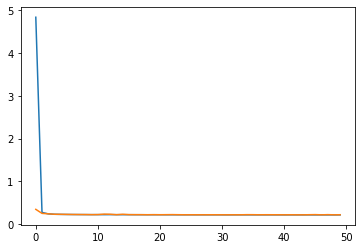

In [74]:
#Step1. Define the model2

model2 = Sequential()

model2.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled_sf.shape[1],)))
model2.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model2.add(Dense(1))


#Step2. Compile the model2
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model2.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model2
history = model2.fit(X_train_scaled_sf, y_train, validation_data=(X_test_scaled_sf, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model2

loss, mse = model2.evaluate(X_test_scaled_sf, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


###4.2.2. Neural Networks with PCA

In [75]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

463/463 [==============================] - 0s 921us/step - loss: 0.2083 - mse: 0.2083


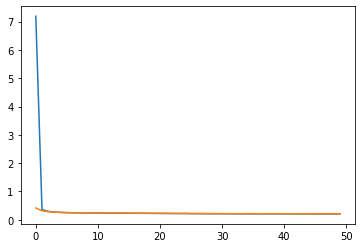

In [76]:
#Step1. Define the model3

model3 = Sequential()

model3.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled_pca.shape[1],)))
model3.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model3.add(Dense(1))


#Step2. Compile the model3
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model3.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model3
history = model3.fit(X_train_scaled_pca, y_train, validation_data=(X_test_scaled_pca, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model3

loss, mse = model3.evaluate(X_test_scaled_pca, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

###4.3. Neural Network with more layers

463/463 [==============================] - 0s 1ms/step - loss: 0.1985 - mse: 0.1985


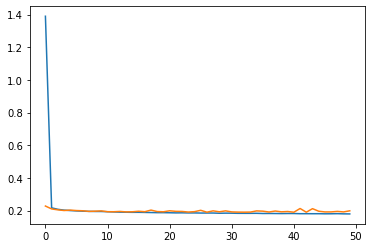

In [77]:
#Step1. Define the model4

model4 = Sequential()

model4.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled.shape[1],)))
model4.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model4.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model4.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model4.add(Dense(1))


#Step2. Compile the model4
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model4.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model4
history = model4.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model4

loss, mse = model4.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

###4.4. Neural Network with different optimizers

463/463 [==============================] - 0s 1ms/step - loss: 0.2178 - mse: 0.2178


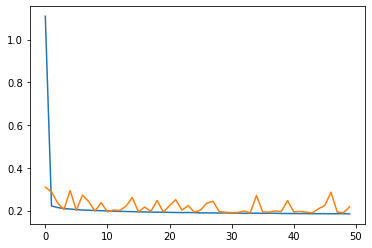

In [78]:
#Step1. Define the model5

model5 = Sequential()

model5.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled.shape[1],)))
model5.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model5.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model5.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model5.add(Dense(1))


#Step2. Compile the model5
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model5.compile(optimizer = 'rmsprop', loss = 'mse', metrics = 'mse')

#Step3. Fit the model5
history = model5.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model5

loss, mse = model5.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

###4.5. Neural Network with higher epochs (with Early Stopping)

463/463 [==============================] - 0s 1ms/step - loss: 0.1934 - mse: 0.1934


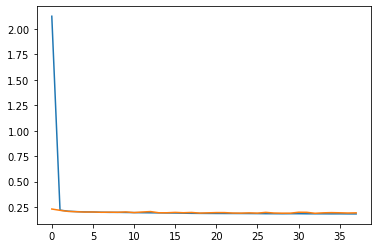

In [79]:
#Step1. Define the model6

model6 = Sequential()

model6.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled.shape[1],)))
model6.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model6.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model6.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model6.add(Dense(1))


#Step2. Compile the model6
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model6.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model6
es = EarlyStopping(monitor = 'val_loss', patience=5)
history = model6.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0, callbacks = [es])

#Step4. Evaluate the model6

loss, mse = model6.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

###4.6 Neural Network with Regularization 

####4.6.1 DropOut

463/463 [==============================] - 1s 1ms/step - loss: 0.2156 - mse: 0.2156


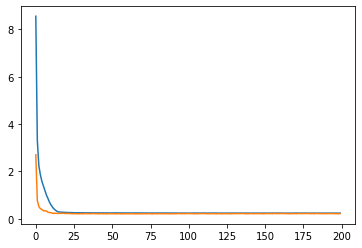

In [80]:
#Step1. Define the model7

model7 = Sequential()

model7.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled.shape[1],)))
model7.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))
model7.add(Dropout(0.3))
model7.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model7.add(Dropout(0.3))
model7.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model7.add(Dropout(0.3))
model7.add(Dense(1))


#Step2. Compile the model7
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model7.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model7
history = model7.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model7

loss, mse = model7.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

####4.6.2 L1/L2 Regularization

463/463 [==============================] - 0s 978us/step - loss: 0.2112 - mse: 0.1889


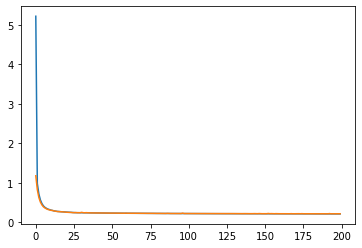

In [81]:
#Step1. Define the model8

model8 = Sequential()

model8.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled.shape[1],)))
model8.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model8.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model8.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model8.add(Dense(1))


#Step2. Compile the model8
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model8.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model8
history = model8.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0)

#Step4. Evaluate the model8

loss, mse = model8.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

###4.7 Neural Network with different activation & initializer

####4.7.1 Sigmoid + Glorot Normal

463/463 [==============================] - 0s 1ms/step - loss: 0.4718 - mse: 0.4706


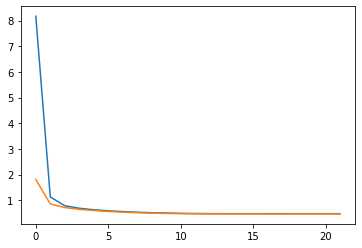

In [82]:
#Step1. Define the model9

model9 = Sequential()

model9.add(Dense(32, activation = 'sigmoid', kernel_initializer = 'glorot_normal', input_shape = (X_train_scaled.shape[1],)))
model9.add(Dense(16, activation = 'sigmoid', kernel_initializer = 'glorot_normal', kernel_regularizer = 'l1'))
model9.add(Dense(8, activation = 'sigmoid', kernel_initializer = 'glorot_normal', kernel_regularizer = 'l1'))
model9.add(Dense(8, activation = 'sigmoid', kernel_initializer = 'glorot_normal', kernel_regularizer = 'l1'))
model9.add(Dense(1))


#Step2. Compile the model9
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model9.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model9
es = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model9.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0, callbacks = [es])

#Step4. Evaluate the model9

loss, mse = model9.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


####4.7.2 Relu + He Uniform

463/463 [==============================] - 0s 1ms/step - loss: 0.2177 - mse: 0.1933


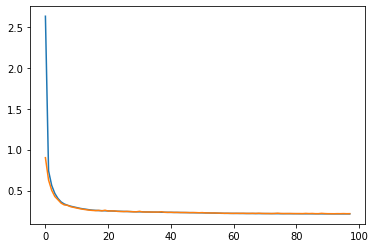

In [83]:
#Step1. Define the model10

model10 = Sequential()

model10.add(Dense(32, activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (X_train_scaled.shape[1],)))
model10.add(Dense(16, activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = 'l1'))
model10.add(Dense(8, activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = 'l1'))
model10.add(Dense(8, activation = 'relu', kernel_initializer = 'he_uniform', kernel_regularizer = 'l1'))
model10.add(Dense(1))


#Step2. Compile the model10
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model10.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model10
es = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model10.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0, callbacks = [es])

#Step4. Evaluate the model10

loss, mse = model10.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

####4.7.3 Relu + Random Normal

463/463 [==============================] - 0s 1ms/step - loss: 0.2175 - mse: 0.1960


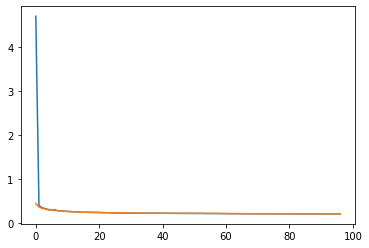

In [84]:
#Step1. Define the model11

model11 = Sequential()

model11.add(Dense(32, activation = 'relu', kernel_initializer = 'random_normal', input_shape = (X_train_scaled.shape[1],)))
model11.add(Dense(16, activation = 'relu', kernel_initializer = 'random_normal', kernel_regularizer = 'l1'))
model11.add(Dense(8, activation = 'relu', kernel_initializer = 'random_normal', kernel_regularizer = 'l1'))
model11.add(Dense(8, activation = 'relu', kernel_initializer = 'random_normal', kernel_regularizer = 'l1'))
model11.add(Dense(1))


#Step2. Compile the model11
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model11.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model11
es = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model11.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, 
                    batch_size=64, verbose=0, callbacks = [es])

#Step4. Evaluate the model11

loss, mse = model11.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


###4.8 Neural Network with smaller batch size

463/463 [==============================] - 0s 949us/step - loss: 0.2141 - mse: 0.1907


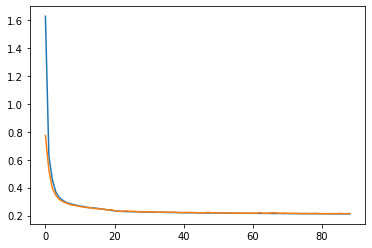

In [86]:
#Step1. Define the model12

model12 = Sequential()

model12.add(Dense(32, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train_scaled.shape[1],)))
model12.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model12.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model12.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer = 'l1'))
model12.add(Dense(1))


#Step2. Compile the model12
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0, name='sgd')
model12.compile(optimizer = 'adam', loss = 'mse', metrics = 'mse')

#Step3. Fit the model12
es = EarlyStopping(monitor = 'val_loss', patience = 5)
history = model12.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, 
                    batch_size=32, verbose=0, callbacks = [es])

#Step4. Evaluate the model12

loss, mse = model12.evaluate(X_test_scaled, y_test)

#Step5. Plot the learning curve

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()


In [87]:
#defining a function to get the predictions for unknown target variables
def solution_airbnb(model, output_filename, df_test_new_scaled=[], test_data=[]):
    model.fit(X_train_scaled,y_train)
    #df_test_new=df_test_new.astype(np.float64)
    pred=model.predict(df_test_new_scaled.astype(np.float64))
    print(pred.shape)
    print(type(pred))
    pred=pred.reshape((24111,))
    output=pd.DataFrame([test_data.id,pred]).transpose()
    output.columns=['id','log_price']
    output.to_csv(output_filename, index=None)
    return output

In [88]:
df_test_new_scaled.shape

(24111, 37)

In [89]:
test_data.id.shape

(24111,)

In [90]:
solution_airbnb(model8, "output_air_bnb_model8.csv", df_test_new_scaled, test_data)

1079/1079 [==============================] - 2s 1ms/step - loss: 0.2084 - mse: 0.1864
(24111, 1)
<class 'numpy.ndarray'>


,id,log_price
0,5979389.0,4.308030
1,13488121.0,4.831590
2,8121643.0,4.528059
3,16490010.0,4.368504
4,16274069.0,5.066986
...,...,...
24106,14549287.0,4.256760
24107,13281809.0,5.073718
24108,18688039.0,5.185093
24109,17045948.0,4.868731
